# Importing the Necessary Libraries:

In [201]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.inspection import permutation_importance

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

%matplotlib inline

In [203]:
df = pd.read_csv('../data/cleaned/combined_all_years_cleaned_final.csv')
df.head()

,County,State,mean_life_expectancy,disability_rate,total_population,age_60_and_over,poverty_rate,housing_cost_burden,bachelors_and_above_percentage,median_gross_rent,...,median_household_income,per_capita_income,high_school_only_percentage,median_home_value,age_18_and_under_percentage,Year,white_percentage,black_percentage,native_american_percentage,asian_percentage
0,Abbeville County,South Carolina,76.554614,19.7,25387.0,14.7,20.8,221.0,11.7,593.0,...,35067.0,17876.0,34.8,90300.0,10.2,2012,69.953126,28.140387,0.070902,0.059085
1,Acadia Parish,Louisiana,74.133702,17.9,61611.0,10.9,19.1,339.0,9.3,541.0,...,38686.0,19369.0,42.2,88900.0,9.9,2012,78.789502,18.152603,0.220740,0.274302
2,Accomack County,Virginia,75.798941,11.8,33454.0,17.5,20.2,199.0,17.3,741.0,...,40780.0,22909.0,39.3,153800.0,8.0,2012,67.513601,28.755904,0.334788,0.122556
3,Ada County,Idaho,80.699209,9.6,394961.0,9.3,12.2,4338.0,37.8,821.0,...,55499.0,27522.0,20.8,193300.0,9.2,2012,91.925532,1.027190,0.536002,2.593674
4,Adair County,Iowa,78.760544,13.7,7628.0,18.6,9.9,43.0,11.5,511.0,...,47872.0,25147.0,45.5,96700.0,7.1,2012,97.758259,0.144206,0.157315,0.603041


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24858 entries, 0 to 24857
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   County                          24858 non-null  object 
 1   State                           24858 non-null  object 
 2   mean_life_expectancy            24858 non-null  float64
 3   disability_rate                 24858 non-null  float64
 4   total_population                24858 non-null  float64
 5   age_60_and_over                 24858 non-null  float64
 6   poverty_rate                    24858 non-null  float64
 7   housing_cost_burden             24858 non-null  float64
 8   bachelors_and_above_percentage  24858 non-null  float64
 9   median_gross_rent               24858 non-null  float64
 10  age_15_to_44_percentage         24858 non-null  float64
 11  gini_index                      24858 non-null  float64
 12  less_than_9th_grade_percentage  

In [207]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_life_expectancy,24858.0,77.365326,2.560676,66.047153,75.614112,77.491757,79.068485,9.225386e+01
disability_rate,24858.0,15.703242,4.407639,3.700000,12.600000,15.300000,18.400000,3.690000e+01
total_population,24858.0,101895.308231,324975.256363,607.000000,11392.250000,26136.500000,68324.250000,1.010572e+07
age_60_and_over,24858.0,18.872476,6.893613,2.000000,13.600000,17.400000,23.700000,6.540000e+01
poverty_rate,24858.0,16.226442,6.488762,2.300000,11.600000,15.400000,19.700000,5.550000e+01
housing_cost_burden,24858.0,1136.591319,4659.092710,0.000000,69.000000,196.000000,610.000000,1.631040e+05
bachelors_and_above_percentage,24858.0,20.421945,9.404331,2.800000,13.900000,18.200000,24.500000,8.020000e+01
median_gross_rent,24858.0,716.431330,203.878841,99.000000,587.000000,667.000000,791.000000,2.316000e+03
age_15_to_44_percentage,24858.0,63.070822,21.253285,16.100000,37.700000,76.800000,79.900000,9.850000e+01
gini_index,24858.0,0.442139,0.035156,0.302300,0.418100,0.439800,0.463800,7.070000e-01


In [209]:
df.columns

Index(['County', 'State', 'mean_life_expectancy', 'disability_rate',
       'total_population', 'age_60_and_over', 'poverty_rate',
       'housing_cost_burden', 'bachelors_and_above_percentage',
       'median_gross_rent', 'age_15_to_44_percentage', 'gini_index',
       'less_than_9th_grade_percentage', 'health_insurance_rate',
       'unemployment_rate', 'median_household_income', 'per_capita_income',
       'high_school_only_percentage', 'median_home_value',
       'age_18_and_under_percentage', 'Year', 'white_percentage',
       'black_percentage', 'native_american_percentage', 'asian_percentage'],
      dtype='object')

# Splitting Data Into Features (X) and Target (y):

In [212]:
X = df.drop(columns=['County', 'State', 'Year', 'mean_life_expectancy']) #Features 
y = df['mean_life_expectancy'] #Target

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (19886, 21)
Testing data shape: (4972, 21)


# Scaling the Data Using StandardScaler

In [219]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [221]:
# Convert targets to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Initializing and Training the Model:

In [282]:
def create_model():
    model = Sequential()

    # Input layer
    model.add(Dense(256, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # Hidden layers with Dropout and L2 regularization
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(1, activation='linear'))  # Linear activation for regression

    # Compile model with Adam optimizer and learning rate
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

In [284]:
model = create_model()

In [286]:
# Use early stopping and learning rate reduction

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

In [288]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/200
249/249 [==============================] - 1s 2ms/step - loss: 5746.0518 - mae: 75.7574 - val_loss: 5342.8545 - val_mae: 73.0758 - lr: 0.0010
Epoch 2/200
249/249 [==============================] - 0s 2ms/step - loss: 4487.4521 - mae: 66.8063 - val_loss: 3531.4517 - val_mae: 59.3975 - lr: 0.0010
Epoch 3/200
249/249 [==============================] - 0s 2ms/step - loss: 2565.1484 - mae: 50.1596 - val_loss: 1669.3759 - val_mae: 40.8080 - lr: 0.0010
Epoch 4/200
249/249 [==============================] - 0s 2ms/step - loss: 1010.2283 - mae: 30.7893 - val_loss: 477.7000 - val_mae: 21.7881 - lr: 0.0010
Epoch 5/200
249/249 [==============================] - 0s 1ms/step - loss: 281.9349 - mae: 14.9577 - val_loss: 84.1557 - val_mae: 9.0221 - lr: 0.0010
Epoch 6/200
249/249 [==============================] - 0s 2ms/step - loss: 90.2106 - mae: 7.5354 - val_loss: 13.2188 - val_mae: 3.2608 - lr: 0.0010
Epoch 7/200
249/249 [==============================] - 0s 2ms/step - loss: 62.3825 - ma

# Saving Model:

In [291]:
from tensorflow.keras.models import load_model

In [293]:
model.save('life_expectancy.h5')

# Evaluating Model Performance:

In [296]:
losses = pd.DataFrame(history.history)

<Axes: >

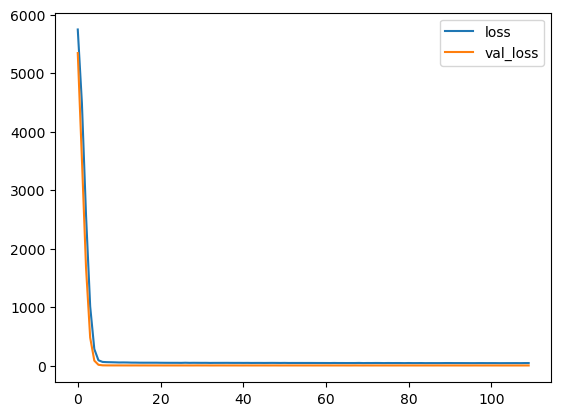

In [298]:
losses[['loss','val_loss']].plot()

In [300]:
train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

train_predictions = train_predictions.ravel()
test_predictions = test_predictions.ravel()

156/156 [==============================] - 0s 570us/step


In [302]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print('Train RMSE:', f'{train_rmse:.2f}')
print('Test RMSE:', f'{test_rmse:.2f}')

Train RMSE: 1.19
Test RMSE: 1.22


In [304]:
# Correlation values
train_r_sq = pearsonr(y_train, train_predictions)[0]
test_r_sq = pearsonr(y_test, test_predictions)[0]
print('Train correlation (R^2):', round(train_r_sq, 2))
print('Test correlation (R^2):', round(test_r_sq, 2))

Train correlation (R^2): 0.9
Test correlation (R^2): 0.89


# Visualize Model Performance:

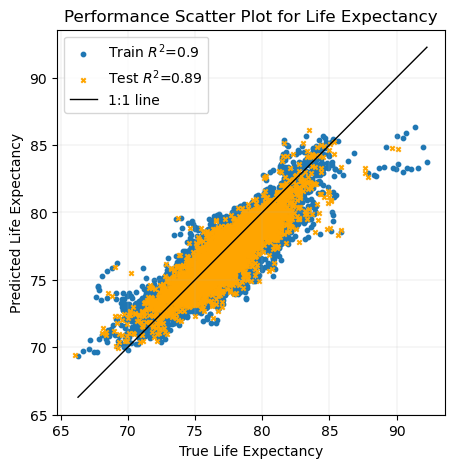

In [307]:
# Scatter plot for model performance
plt.figure(figsize=(5, 5))
plt.scatter(y_train, train_predictions, s=10, c='C0', label=f'Train $R^2$={round(train_r_sq, 2)}')
plt.scatter(y_test, test_predictions, marker='x', s=10, c='orange', label=f'Test $R^2$={round(test_r_sq, 2)}')
p1 = max(max(train_predictions), max(y_train))
p2 = min(min(train_predictions), min(y_train))
plt.plot([p1, p2], [p1, p2], 'black', label='1:1 line', linewidth=1)
plt.xlabel('True Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title("Performance Scatter Plot for Life Expectancy")
plt.legend()
plt.grid(axis='both', linewidth=0.15)
plt.show()

<Figure size 500x500 with 0 Axes>

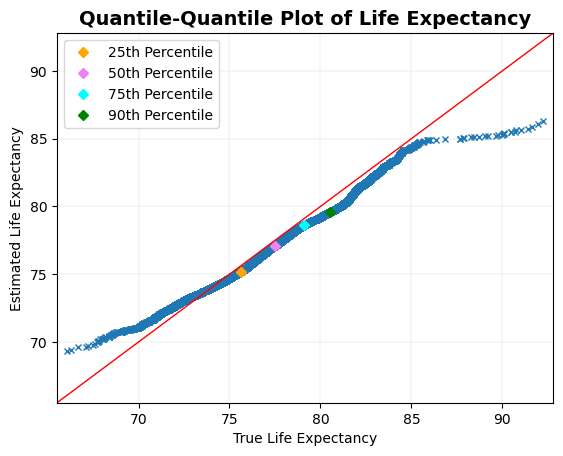

In [309]:
# Quantile-Quantile Plot
all_predictions = np.concatenate((train_predictions, test_predictions))
all_targets = np.concatenate((y_train, y_test))

predictions_sorted = np.sort(all_predictions)
targets_sorted = np.sort(all_targets)

plt.figure(figsize=(5, 5))
pp_x = sm.ProbPlot(predictions_sorted, fit=False)
pp_y = sm.ProbPlot(targets_sorted, fit=False)
qq = pp_x.qqplot(xlabel='True Life Expectancy', ylabel='Estimated Life Expectancy', marker='x', markersize=4, other=pp_y)

# Draw the 45-degree line
sm.qqline(qq.axes[0], line='45', fmt='r', linewidth=1)

# Highlight percentiles for interpretation
targets_25 = np.percentile(targets_sorted, 25)
targets_50 = np.percentile(targets_sorted, 50)
targets_75 = np.percentile(targets_sorted, 75)
targets_90 = np.percentile(targets_sorted, 90)

predictions_25 = np.percentile(predictions_sorted, 25)
predictions_50 = np.percentile(predictions_sorted, 50)
predictions_75 = np.percentile(predictions_sorted, 75)
predictions_90 = np.percentile(predictions_sorted, 90)

# Plotting the percentile markers
plt.plot(targets_25, predictions_25, marker="D", markersize=5, color="orange", linestyle='None', label="25th Percentile")
plt.plot(targets_50, predictions_50, marker="D", markersize=5, color="violet", linestyle='None', label="50th Percentile")
plt.plot(targets_75, predictions_75, marker="D", markersize=5, color="cyan", linestyle='None', label="75th Percentile")
plt.plot(targets_90, predictions_90, marker="D", markersize=5, color="green", linestyle='None', label="90th Percentile")

plt.title('Quantile-Quantile Plot of Life Expectancy', fontsize=14, fontweight="bold")
plt.grid(axis='both', linewidth=0.15)
plt.legend()
plt.show()

# Using Hyperpameter Optimization:

In [312]:
import optuna
import tensorflow as tf

In [317]:
# Objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 3)
    hidden_units = trial.suggest_int("hidden_units", 32, 256)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    
    # Build the model
    model = Sequential()
    model.add(Dense(hidden_units, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(num_hidden_layers - 1):
        model.add(Dense(hidden_units, activation=activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate), loss="mse")
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        batch_size=32,
        epochs=50,
        verbose=0  # Suppress verbose output for speed
    )
    
    # Evaluate the model
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    
    return mse  # Optuna minimizes this value

In [318]:
# Create an Optuna study
study = optuna.create_study(direction="minimize")  # Minimize MSE
study.optimize(objective, n_trials=50)  # Number of trials

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", study.best_params)
print("Best MSE:", study.best_value)

[I 2025-01-11 00:12:23,698] A new study created in memory with name: no-name-7011f89e-ca8e-466d-b368-3297ea6eb75a
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 322us/step


[I 2025-01-11 00:12:42,443] Trial 0 finished with value: 6.587747248182271 and parameters: {'num_hidden_layers': 3, 'hidden_units': 141, 'dropout_rate': 0.2740206581655082, 'activation': 'relu', 'learning_rate': 0.0015070711496765615}. Best is trial 0 with value: 6.587747248182271.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 344us/step


[I 2025-01-11 00:13:00,369] Trial 1 finished with value: 5.292242235067419 and parameters: {'num_hidden_layers': 2, 'hidden_units': 238, 'dropout_rate': 0.15427872572576753, 'activation': 'tanh', 'learning_rate': 0.0008242760360834191}. Best is trial 1 with value: 5.292242235067419.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 329us/step


[I 2025-01-11 00:13:18,861] Trial 2 finished with value: 1092.5357711264048 and parameters: {'num_hidden_layers': 2, 'hidden_units': 225, 'dropout_rate': 0.4918183285162773, 'activation': 'relu', 'learning_rate': 0.0010185964461843964}. Best is trial 1 with value: 5.292242235067419.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 298us/step


[I 2025-01-11 00:13:37,961] Trial 3 finished with value: 6.96857467411893 and parameters: {'num_hidden_layers': 2, 'hidden_units': 217, 'dropout_rate': 0.4560246824886916, 'activation': 'tanh', 'learning_rate': 0.005116116743231773}. Best is trial 1 with value: 5.292242235067419.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 267us/step


[I 2025-01-11 00:13:49,466] Trial 4 finished with value: 5.199269358302633 and parameters: {'num_hidden_layers': 1, 'hidden_units': 238, 'dropout_rate': 0.33922892142198824, 'activation': 'tanh', 'learning_rate': 0.00038175756175633425}. Best is trial 4 with value: 5.199269358302633.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 251us/step


[I 2025-01-11 00:13:59,828] Trial 5 finished with value: 59544.886827535265 and parameters: {'num_hidden_layers': 1, 'hidden_units': 123, 'dropout_rate': 0.15601454844787666, 'activation': 'relu', 'learning_rate': 0.00030351646659849176}. Best is trial 4 with value: 5.199269358302633.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 261us/step


[I 2025-01-11 00:14:09,970] Trial 6 finished with value: 6.591704382087518 and parameters: {'num_hidden_layers': 1, 'hidden_units': 86, 'dropout_rate': 0.44699729648003306, 'activation': 'tanh', 'learning_rate': 0.009158816386532619}. Best is trial 4 with value: 5.199269358302633.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 316us/step


[I 2025-01-11 00:14:28,874] Trial 7 finished with value: 5.803379056758255 and parameters: {'num_hidden_layers': 2, 'hidden_units': 239, 'dropout_rate': 0.33781188208631596, 'activation': 'tanh', 'learning_rate': 0.0009427814468534795}. Best is trial 4 with value: 5.199269358302633.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 255us/step


[I 2025-01-11 00:14:38,926] Trial 8 finished with value: 6.091606015310352 and parameters: {'num_hidden_layers': 1, 'hidden_units': 131, 'dropout_rate': 0.4223819463561316, 'activation': 'tanh', 'learning_rate': 0.0012062037961635245}. Best is trial 4 with value: 5.199269358302633.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 319us/step


[I 2025-01-11 00:14:58,090] Trial 9 finished with value: 4.732136978095772 and parameters: {'num_hidden_layers': 2, 'hidden_units': 247, 'dropout_rate': 0.2020720956305493, 'activation': 'tanh', 'learning_rate': 0.00012160912429718907}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 341us/step


[I 2025-01-11 00:15:21,108] Trial 10 finished with value: 818.7476589082743 and parameters: {'num_hidden_layers': 3, 'hidden_units': 177, 'dropout_rate': 0.24827870457948611, 'activation': 'relu', 'learning_rate': 0.0001234668150223501}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 260us/step


[I 2025-01-11 00:15:30,481] Trial 11 finished with value: 5.578080380902268 and parameters: {'num_hidden_layers': 1, 'hidden_units': 188, 'dropout_rate': 0.35354709652565586, 'activation': 'tanh', 'learning_rate': 0.00014178237203141166}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 266us/step


[I 2025-01-11 00:15:42,433] Trial 12 finished with value: 5.7940764170884576 and parameters: {'num_hidden_layers': 3, 'hidden_units': 39, 'dropout_rate': 0.21990110021531767, 'activation': 'tanh', 'learning_rate': 0.0003370954661588527}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 261us/step


[I 2025-01-11 00:15:53,668] Trial 13 finished with value: 5.306957002540893 and parameters: {'num_hidden_layers': 1, 'hidden_units': 253, 'dropout_rate': 0.10490319746979088, 'activation': 'tanh', 'learning_rate': 0.00029313868639100444}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 317us/step


[I 2025-01-11 00:16:10,846] Trial 14 finished with value: 4.97462484777051 and parameters: {'num_hidden_layers': 2, 'hidden_units': 189, 'dropout_rate': 0.33005750886682955, 'activation': 'tanh', 'learning_rate': 0.00018647268903793844}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 309us/step


[I 2025-01-11 00:16:25,916] Trial 15 finished with value: 4.98004870731316 and parameters: {'num_hidden_layers': 2, 'hidden_units': 192, 'dropout_rate': 0.2035859610318949, 'activation': 'tanh', 'learning_rate': 0.00011472471392517312}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 299us/step


[I 2025-01-11 00:16:42,549] Trial 16 finished with value: 5.151090366407207 and parameters: {'num_hidden_layers': 2, 'hidden_units': 171, 'dropout_rate': 0.39166276882519435, 'activation': 'tanh', 'learning_rate': 0.0002195310517213262}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 353us/step


[I 2025-01-11 00:17:06,733] Trial 17 finished with value: 5.724469102148287 and parameters: {'num_hidden_layers': 3, 'hidden_units': 206, 'dropout_rate': 0.29204569093899513, 'activation': 'tanh', 'learning_rate': 0.0005390105495164169}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 293us/step


[I 2025-01-11 00:17:22,290] Trial 18 finished with value: 2002.0207097599057 and parameters: {'num_hidden_layers': 2, 'hidden_units': 161, 'dropout_rate': 0.1797117648181398, 'activation': 'relu', 'learning_rate': 0.002537374295015904}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 262us/step


[I 2025-01-11 00:17:33,924] Trial 19 finished with value: 5.284515902632111 and parameters: {'num_hidden_layers': 2, 'hidden_units': 100, 'dropout_rate': 0.2496123916005897, 'activation': 'tanh', 'learning_rate': 0.00020007548854817725}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 360us/step


[I 2025-01-11 00:17:58,147] Trial 20 finished with value: 5.33211190052287 and parameters: {'num_hidden_layers': 3, 'hidden_units': 210, 'dropout_rate': 0.11254313581759509, 'activation': 'tanh', 'learning_rate': 0.0005672298698909835}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 346us/step


[I 2025-01-11 00:18:16,671] Trial 21 finished with value: 4.936566949369787 and parameters: {'num_hidden_layers': 2, 'hidden_units': 193, 'dropout_rate': 0.19577353611322965, 'activation': 'tanh', 'learning_rate': 0.00010510254119843581}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 308us/step


[I 2025-01-11 00:18:33,961] Trial 22 finished with value: 5.056737508032807 and parameters: {'num_hidden_layers': 2, 'hidden_units': 163, 'dropout_rate': 0.3108866143881357, 'activation': 'tanh', 'learning_rate': 0.00010205633248953551}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 333us/step


[I 2025-01-11 00:18:55,666] Trial 23 finished with value: 4.955079066182288 and parameters: {'num_hidden_layers': 2, 'hidden_units': 256, 'dropout_rate': 0.22783807084044966, 'activation': 'tanh', 'learning_rate': 0.0001885449897341206}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 321us/step


[I 2025-01-11 00:19:17,503] Trial 24 finished with value: 4.887046018899748 and parameters: {'num_hidden_layers': 2, 'hidden_units': 254, 'dropout_rate': 0.21692273490928898, 'activation': 'tanh', 'learning_rate': 0.00015058525535296518}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 312us/step


[I 2025-01-11 00:19:35,692] Trial 25 finished with value: 4.767013226311235 and parameters: {'num_hidden_layers': 2, 'hidden_units': 221, 'dropout_rate': 0.18504976374103999, 'activation': 'tanh', 'learning_rate': 0.0001504073023086821}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 355us/step


[I 2025-01-11 00:20:03,266] Trial 26 finished with value: 6.570346298704848 and parameters: {'num_hidden_layers': 3, 'hidden_units': 230, 'dropout_rate': 0.14814904685887084, 'activation': 'relu', 'learning_rate': 0.0005043570200745557}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 372us/step


[I 2025-01-11 00:20:24,664] Trial 27 finished with value: 5.1106944213674605 and parameters: {'num_hidden_layers': 2, 'hidden_units': 253, 'dropout_rate': 0.17471840296055435, 'activation': 'tanh', 'learning_rate': 0.00017314883757694314}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 312us/step


[I 2025-01-11 00:20:42,478] Trial 28 finished with value: 4.98137015296324 and parameters: {'num_hidden_layers': 2, 'hidden_units': 206, 'dropout_rate': 0.2586983582092841, 'activation': 'tanh', 'learning_rate': 0.0002677925176537976}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 463us/step


[I 2025-01-11 00:21:06,948] Trial 29 finished with value: 7.495308515305708 and parameters: {'num_hidden_layers': 3, 'hidden_units': 220, 'dropout_rate': 0.2820384729320568, 'activation': 'relu', 'learning_rate': 0.0018717265002059654}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 318us/step


[I 2025-01-11 00:21:22,983] Trial 30 finished with value: 5.074701317241999 and parameters: {'num_hidden_layers': 2, 'hidden_units': 148, 'dropout_rate': 0.13342857047423082, 'activation': 'tanh', 'learning_rate': 0.0001479256773215414}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 340us/step


[I 2025-01-11 00:21:44,368] Trial 31 finished with value: 4.941430334680245 and parameters: {'num_hidden_layers': 2, 'hidden_units': 241, 'dropout_rate': 0.18899943234478803, 'activation': 'tanh', 'learning_rate': 0.00010435618623131851}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 413us/step


[I 2025-01-11 00:22:04,310] Trial 32 finished with value: 4.872194746887718 and parameters: {'num_hidden_layers': 2, 'hidden_units': 203, 'dropout_rate': 0.21306442354380278, 'activation': 'tanh', 'learning_rate': 0.0001423082590529983}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 311us/step


[I 2025-01-11 00:22:24,938] Trial 33 finished with value: 5.064023356094408 and parameters: {'num_hidden_layers': 2, 'hidden_units': 226, 'dropout_rate': 0.22555111337350983, 'activation': 'tanh', 'learning_rate': 0.00024047836987954287}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 372us/step


[I 2025-01-11 00:22:46,681] Trial 34 finished with value: 4.90155635237148 and parameters: {'num_hidden_layers': 2, 'hidden_units': 243, 'dropout_rate': 0.1653324031655948, 'activation': 'tanh', 'learning_rate': 0.0001540954516400346}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 338us/step


[I 2025-01-11 00:23:04,678] Trial 35 finished with value: 5.251623873360995 and parameters: {'num_hidden_layers': 2, 'hidden_units': 224, 'dropout_rate': 0.21448942234244572, 'activation': 'tanh', 'learning_rate': 0.0003790484900129068}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 325us/step


[I 2025-01-11 00:23:24,231] Trial 36 finished with value: 191.36103818091658 and parameters: {'num_hidden_layers': 2, 'hidden_units': 213, 'dropout_rate': 0.12742330167560023, 'activation': 'relu', 'learning_rate': 0.00013682222228858363}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 270us/step


[I 2025-01-11 00:23:35,169] Trial 37 finished with value: 5.3008275062729036 and parameters: {'num_hidden_layers': 1, 'hidden_units': 233, 'dropout_rate': 0.2599904279453218, 'activation': 'tanh', 'learning_rate': 0.0004110745588409972}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 340us/step


[I 2025-01-11 00:23:54,711] Trial 38 finished with value: 5.413944079051574 and parameters: {'num_hidden_layers': 2, 'hidden_units': 243, 'dropout_rate': 0.14012628288069706, 'activation': 'tanh', 'learning_rate': 0.0006703922097996731}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 314us/step


[I 2025-01-11 00:24:11,331] Trial 39 finished with value: 6.743863119723073 and parameters: {'num_hidden_layers': 2, 'hidden_units': 201, 'dropout_rate': 0.16333774571956639, 'activation': 'tanh', 'learning_rate': 0.004237961811414173}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 255us/step


[I 2025-01-11 00:24:20,760] Trial 40 finished with value: 11811.737242039446 and parameters: {'num_hidden_layers': 1, 'hidden_units': 220, 'dropout_rate': 0.23654518374682362, 'activation': 'relu', 'learning_rate': 0.00024040853503809413}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 333us/step


[I 2025-01-11 00:24:39,718] Trial 41 finished with value: 5.1591329712120615 and parameters: {'num_hidden_layers': 2, 'hidden_units': 243, 'dropout_rate': 0.17226668362224723, 'activation': 'tanh', 'learning_rate': 0.00015939462219037692}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 332us/step


[I 2025-01-11 00:24:56,698] Trial 42 finished with value: 4.897333650217187 and parameters: {'num_hidden_layers': 2, 'hidden_units': 248, 'dropout_rate': 0.20384149522939743, 'activation': 'tanh', 'learning_rate': 0.00013899901764926682}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 352us/step


[I 2025-01-11 00:25:16,284] Trial 43 finished with value: 4.906384359671907 and parameters: {'num_hidden_layers': 2, 'hidden_units': 253, 'dropout_rate': 0.20344797084345143, 'activation': 'tanh', 'learning_rate': 0.0001270193802175606}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 335us/step


[I 2025-01-11 00:25:34,793] Trial 44 finished with value: 5.125224038068658 and parameters: {'num_hidden_layers': 2, 'hidden_units': 233, 'dropout_rate': 0.2645847139476619, 'activation': 'tanh', 'learning_rate': 0.00022349842109393238}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 346us/step


[I 2025-01-11 00:25:54,891] Trial 45 finished with value: 5.707203110497304 and parameters: {'num_hidden_layers': 2, 'hidden_units': 246, 'dropout_rate': 0.49699692604827, 'activation': 'tanh', 'learning_rate': 0.00013379599625457756}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 272us/step


[I 2025-01-11 00:26:05,755] Trial 46 finished with value: 5.7226824027383865 and parameters: {'num_hidden_layers': 2, 'hidden_units': 58, 'dropout_rate': 0.20865972853344444, 'activation': 'tanh', 'learning_rate': 0.0001720448863958144}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 310us/step


[I 2025-01-11 00:26:20,932] Trial 47 finished with value: 5.188549558729033 and parameters: {'num_hidden_layers': 2, 'hidden_units': 180, 'dropout_rate': 0.23949159332922668, 'activation': 'tanh', 'learning_rate': 0.0003078627684267592}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 0s 244us/step


[I 2025-01-11 00:26:30,501] Trial 48 finished with value: 6.620266754341635 and parameters: {'num_hidden_layers': 1, 'hidden_units': 232, 'dropout_rate': 0.19397538049284435, 'activation': 'tanh', 'learning_rate': 0.009754718905759957}. Best is trial 9 with value: 4.732136978095772.
/var/folders/sc/k6080_9j4cx42wf_vh5ybvmw0000gn/T/ipykernel_16470/935947109.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


156/156 [==============================] - 1s 379us/step


[I 2025-01-11 00:26:53,189] Trial 49 finished with value: 5.327856749950642 and parameters: {'num_hidden_layers': 3, 'hidden_units': 200, 'dropout_rate': 0.31042949465793895, 'activation': 'tanh', 'learning_rate': 0.00012456131989056304}. Best is trial 9 with value: 4.732136978095772.


Best hyperparameters: {'num_hidden_layers': 2, 'hidden_units': 247, 'dropout_rate': 0.2020720956305493, 'activation': 'tanh', 'learning_rate': 0.00012160912429718907}
Best MSE: 4.732136978095772


In [323]:
# Retrieve the best hyperparameters
best_params = study.best_params
best_params

{'num_hidden_layers': 2,
 'hidden_units': 247,
 'dropout_rate': 0.2020720956305493,
 'activation': 'tanh',
 'learning_rate': 0.00012160912429718907}

In [325]:
# Rebuild the model using the best hyperparameters
model = Sequential()
model.add(Dense(best_params["hidden_units"], activation=best_params["activation"], input_shape=(X_train.shape[1],)))
for _ in range(best_params["num_hidden_layers"] - 1):
    model.add(Dense(best_params["hidden_units"], activation=best_params["activation"]))
    model.add(Dropout(best_params["dropout_rate"]))
model.add(Dense(1))

In [327]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=best_params["learning_rate"]), loss="mse")

In [343]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/200
249/249 [==============================] - 0s 1ms/step - loss: 4398.4229 - val_loss: 1143.0748 - lr: 1.2161e-04
Epoch 2/200
249/249 [==============================] - 0s 1ms/step - loss: 326.7843 - val_loss: 52.0851 - lr: 1.2161e-04
Epoch 3/200
249/249 [==============================] - 0s 1ms/step - loss: 25.4882 - val_loss: 8.9252 - lr: 1.2161e-04
Epoch 4/200
249/249 [==============================] - 0s 1ms/step - loss: 14.2652 - val_loss: 6.6524 - lr: 1.2161e-04
Epoch 5/200
249/249 [==============================] - 0s 1ms/step - loss: 12.6877 - val_loss: 5.7795 - lr: 1.2161e-04
Epoch 6/200
249/249 [==============================] - 0s 1ms/step - loss: 11.9989 - val_loss: 5.2070 - lr: 1.2161e-04
Epoch 7/200
249/249 [==============================] - 0s 1ms/step - loss: 11.3413 - val_loss: 4.7376 - lr: 1.2161e-04
Epoch 8/200
249/249 [==============================] - 0s 1ms/step - loss: 11.2713 - val_loss: 4.3265 - lr: 1.2161e-04
Epoch 9/200
249/249 [====================

In [345]:
losses = pd.DataFrame(history.history)

<Axes: >

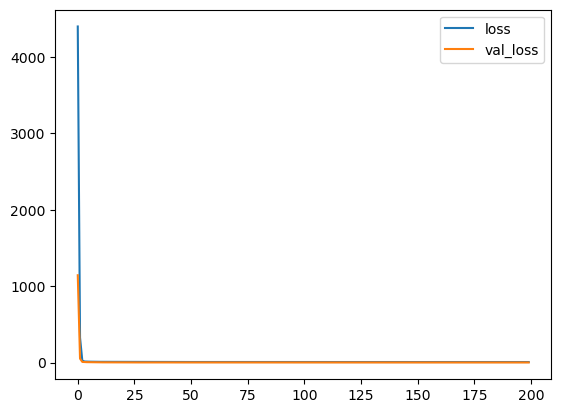

In [347]:
losses[['loss','val_loss']].plot()

In [349]:
train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

train_predictions = train_predictions.ravel()
test_predictions = test_predictions.ravel()

156/156 [==============================] - 0s 386us/step


In [351]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print('Train RMSE:', f'{train_rmse:.2f}')
print('Test RMSE:', f'{test_rmse:.2f}')

Train RMSE: 1.17
Test RMSE: 1.20


In [353]:
# Correlation values
train_r_sq = pearsonr(y_train, train_predictions)[0]
test_r_sq = pearsonr(y_test, test_predictions)[0]
print('Train correlation (R^2):', round(train_r_sq, 2))
print('Test correlation (R^2):', round(test_r_sq, 2))

Train correlation (R^2): 0.89
Test correlation (R^2): 0.89


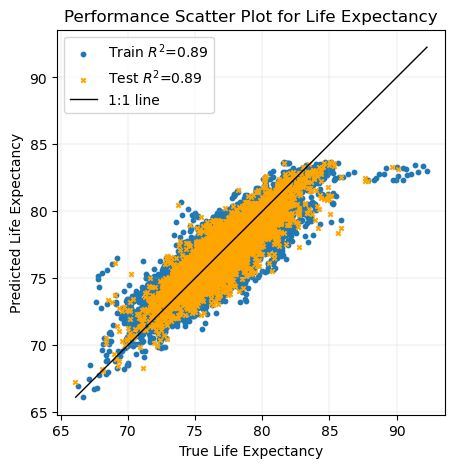

In [355]:
# Scatter plot for model performance
plt.figure(figsize=(5, 5))
plt.scatter(y_train, train_predictions, s=10, c='C0', label=f'Train $R^2$={round(train_r_sq, 2)}')
plt.scatter(y_test, test_predictions, marker='x', s=10, c='orange', label=f'Test $R^2$={round(test_r_sq, 2)}')
p1 = max(max(train_predictions), max(y_train))
p2 = min(min(train_predictions), min(y_train))
plt.plot([p1, p2], [p1, p2], 'black', label='1:1 line', linewidth=1)
plt.xlabel('True Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title("Performance Scatter Plot for Life Expectancy")
plt.legend()
plt.grid(axis='both', linewidth=0.15)
plt.show()

<Figure size 500x500 with 0 Axes>

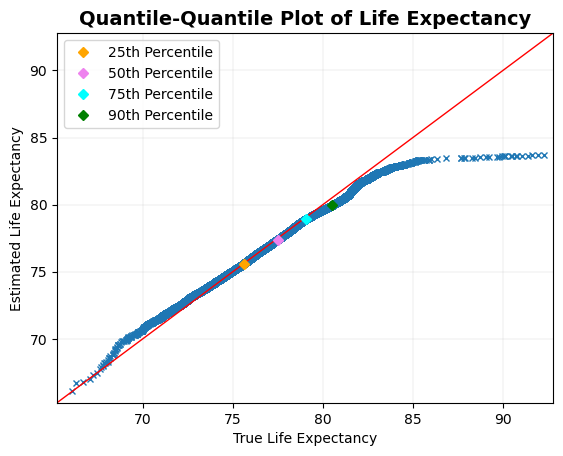

In [357]:
# Quantile-Quantile Plot
all_predictions = np.concatenate((train_predictions, test_predictions))
all_targets = np.concatenate((y_train, y_test))

predictions_sorted = np.sort(all_predictions)
targets_sorted = np.sort(all_targets)

plt.figure(figsize=(5, 5))
pp_x = sm.ProbPlot(predictions_sorted, fit=False)
pp_y = sm.ProbPlot(targets_sorted, fit=False)
qq = pp_x.qqplot(xlabel='True Life Expectancy', ylabel='Estimated Life Expectancy', marker='x', markersize=4, other=pp_y)

# Draw the 45-degree line
sm.qqline(qq.axes[0], line='45', fmt='r', linewidth=1)

# Highlight percentiles for interpretation
targets_25 = np.percentile(targets_sorted, 25)
targets_50 = np.percentile(targets_sorted, 50)
targets_75 = np.percentile(targets_sorted, 75)
targets_90 = np.percentile(targets_sorted, 90)

predictions_25 = np.percentile(predictions_sorted, 25)
predictions_50 = np.percentile(predictions_sorted, 50)
predictions_75 = np.percentile(predictions_sorted, 75)
predictions_90 = np.percentile(predictions_sorted, 90)

# Plotting the percentile markers
plt.plot(targets_25, predictions_25, marker="D", markersize=5, color="orange", linestyle='None', label="25th Percentile")
plt.plot(targets_50, predictions_50, marker="D", markersize=5, color="violet", linestyle='None', label="50th Percentile")
plt.plot(targets_75, predictions_75, marker="D", markersize=5, color="cyan", linestyle='None', label="75th Percentile")
plt.plot(targets_90, predictions_90, marker="D", markersize=5, color="green", linestyle='None', label="90th Percentile")

plt.title('Quantile-Quantile Plot of Life Expectancy', fontsize=14, fontweight="bold")
plt.grid(axis='both', linewidth=0.15)
plt.legend()
plt.show()